<h1>연결 성분 찾기</h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-13-연결_성분_찾기.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC5/blob/main/gg-13-연결_성분_찾기.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

시작전에 m5_11.png를 코랩 환경의 '/content/sample_data'에 업로드해준다.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   133  100   133    0     0   2418      0 --:--:-- --:--:-- --:--:--  2418
100 53578  100 53578    0     0   337k      0 --:--:-- --:--:-- --:--:--  337k


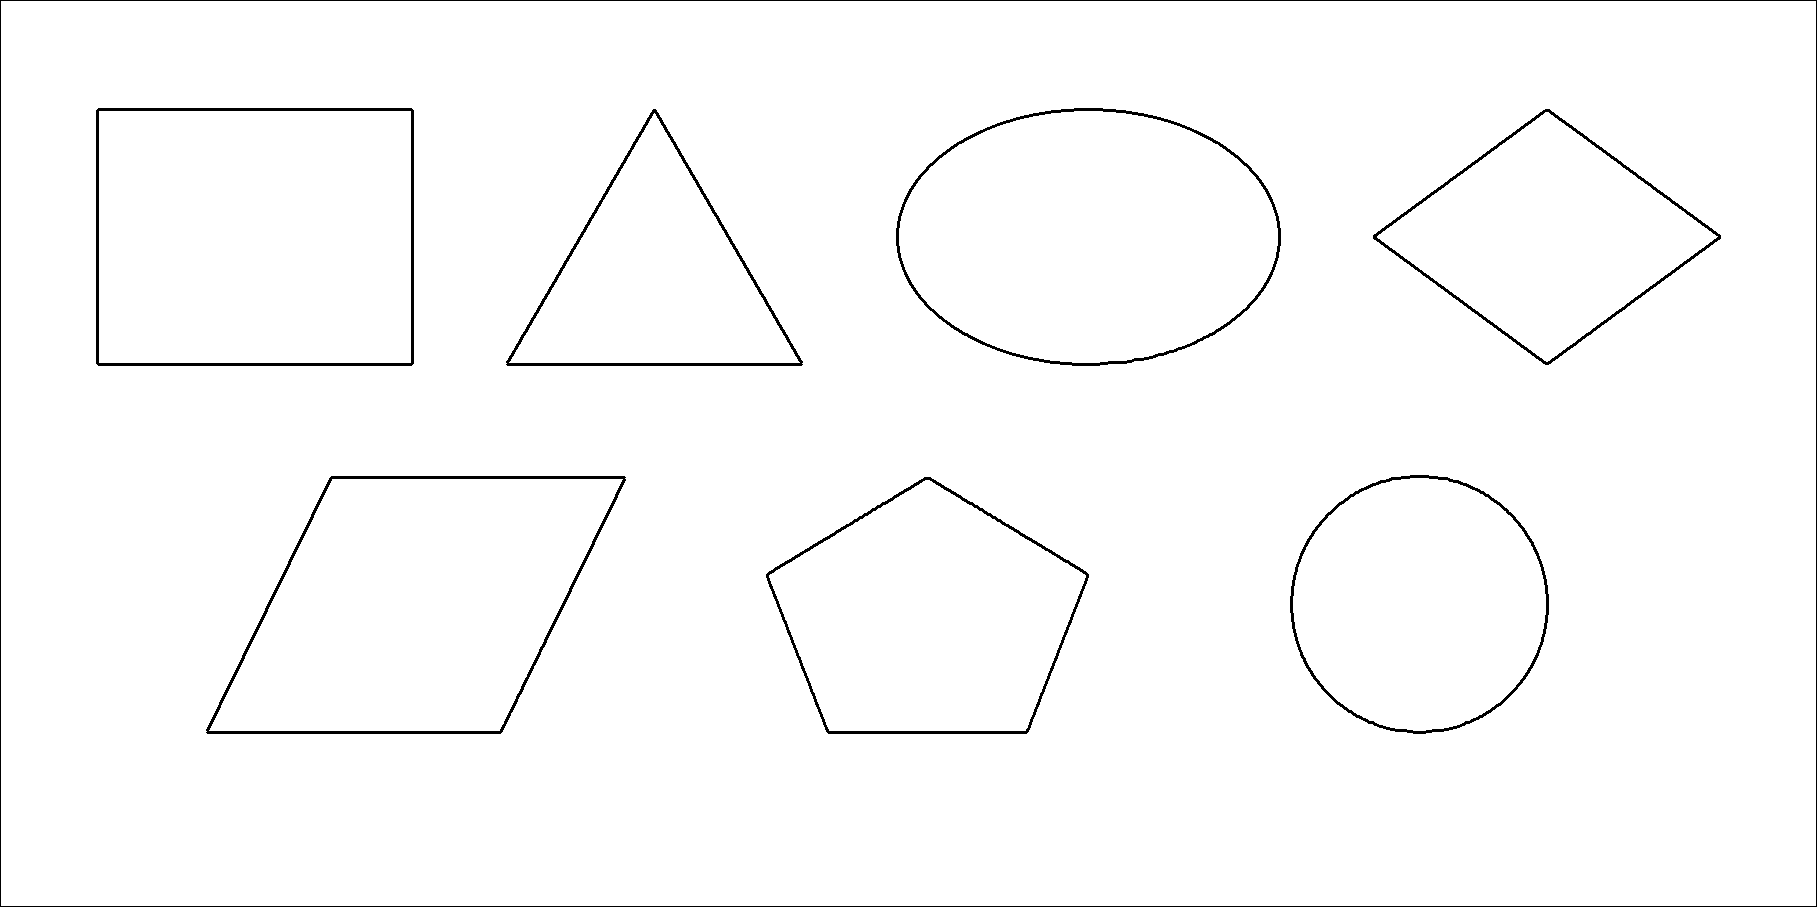

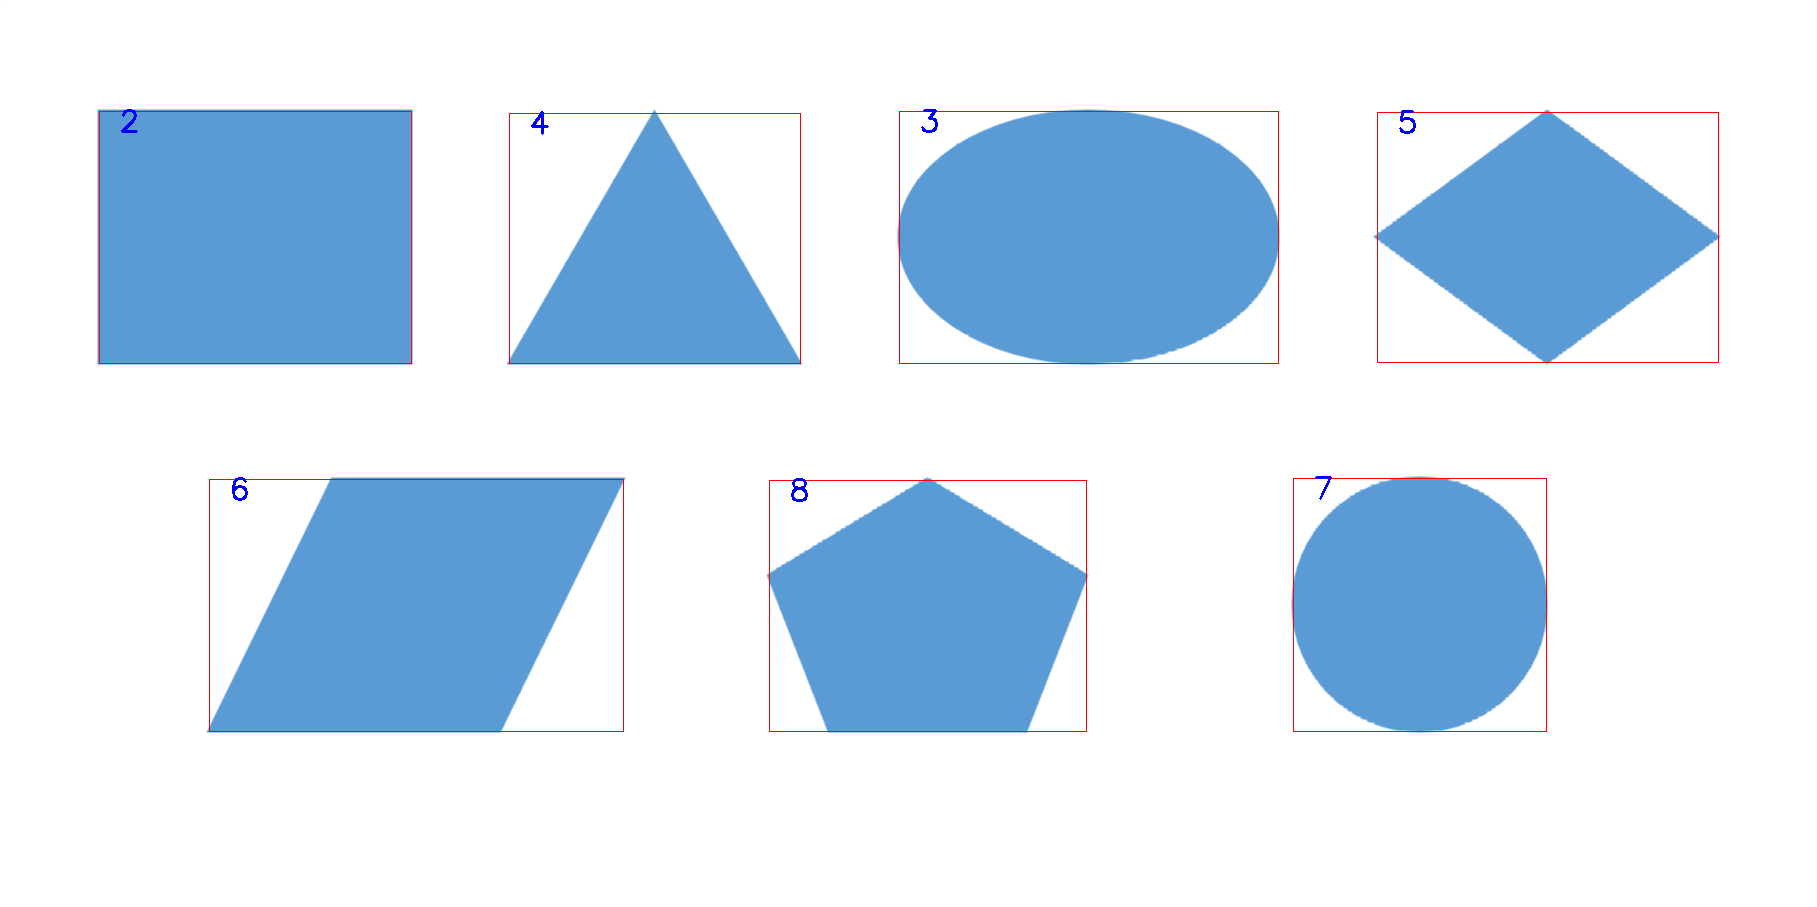

In [15]:
import cv2
from google.colab.patches import cv2_imshow

# 이미지 읽기
!curl -L https://github.com/swkim01/DSAC5/raw/main/data/m5_11.png -o m5_11.png
image = cv2.imread('./m5_11.png', cv2.IMREAD_COLOR)
#image = cv2.imread("/content/sample_data/m5_11.png", cv2.IMREAD_COLOR)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY) 
edge = cv2.Canny(gray, 50, 150) 

edge = cv2.bitwise_not(edge)
contours, hierachy = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(edge, contours, -1, (0, 0, 0), 1)
cv2_imshow(edge)

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(edge)
for i in range(nlabels):

    if i < 2:
        continue
        
    area = stats[i, cv2.CC_STAT_AREA]
    center_x = int(centroids[i, 0])
    center_y = int(centroids[i, 1]) 
    left = stats[i, cv2.CC_STAT_LEFT]
    top = stats[i, cv2.CC_STAT_TOP]
    width = stats[i, cv2.CC_STAT_WIDTH]
    height = stats[i, cv2.CC_STAT_HEIGHT]

    if area > 50:
        cv2.rectangle(image, (left, top), (left + width, top + height), (0, 0, 255), 1)
        cv2.putText(image, str(i), (left + 20, top + 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        
cv2_imshow(image)